In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df_list=[]
for i in range(1,14):
    df=pd.read_excel(str(i)+'.xlsx')
    df_list.append(df)
    print(df.columns)

Index(['航班日期', '机型', '实际降落', '航班状态'], dtype='object')
Index(['航班日期', '机型', '实际降落', '航班状态'], dtype='object')
Index(['航班日期', '机型', '实际降落', '航班状态'], dtype='object')
Index(['航班日期', '机型', '实际降落', '航班状态'], dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', '航空公司', '机型', '出发地', '经停站', '计划降落', '预计降落', '实际降落',
       '航站楼', '行李转盘', '航班状态'],
      dtype='object')
Index(['航班日期', '航班号', 

In [201]:
df_all=pd.DataFrame({'Date':pd.concat([df_list[i]['航班日期'] for i in range(13)]),\
                     'Size':pd.concat([df_list[i]['机型'] for i in range(13)]),\
                     'Time':pd.concat([df_list[i]['实际降落'] for i in range(13)]),\
                     'State':pd.concat([df_list[i]['航班状态'] for i in range(13)])})

In [202]:
df_all.to_csv('puck.csv')

In [203]:
df_all['Size'].value_counts()

B738    87
A320    72
A20N    41
A321    29
A319    14
B737     6
A21N     4
B734     2
E190     1
B733     1
A333     1
B789     1
G450     1
Name: Size, dtype: int64

In [227]:
dict={'B738':189,'A320':120,'A20N':89,'A321':181,'A319':128,'B737':158,'A21N':198,\
      'B734':171,'E190':98,'B733':128,'A333':338,'B789':259,'G450':16}
df_all.index=range(260)
list_all=[]
for i in range(1000):
    list1=[0]*24
    for i in df_all.index:
        if(df_all['State'][i]=='航班结束' or df_all['State'][i]=='降落'):
            list1[df_all['Time'][i].hour]=list1[df_all['Time'][i].hour]+dict[df_all['Size'][i]]*random.uniform(0.8,1)
    list_all.append(list1)
list2=[]
for j in range(8,23):
    sum=0
    for i in range(1000):
        sum=list_all[i][j]+sum
    list2.append(sum/5000)
for i in list2:
    print(i)
print(list2)

482.92384339050875
466.2464954040015
176.4201912658369
379.41473508684186
678.3444465647857
121.61489847283039
444.95698447572374
373.94354571481523
397.5699273813874
382.4335257525081
447.9110892790678
600.1870188446524
442.1243290493711
365.66558843341585
181.0431194735817
[482.92384339050875, 466.2464954040015, 176.4201912658369, 379.41473508684186, 678.3444465647857, 121.61489847283039, 444.95698447572374, 373.94354571481523, 397.5699273813874, 382.4335257525081, 447.9110892790678, 600.1870188446524, 442.1243290493711, 365.66558843341585, 181.0431194735817]


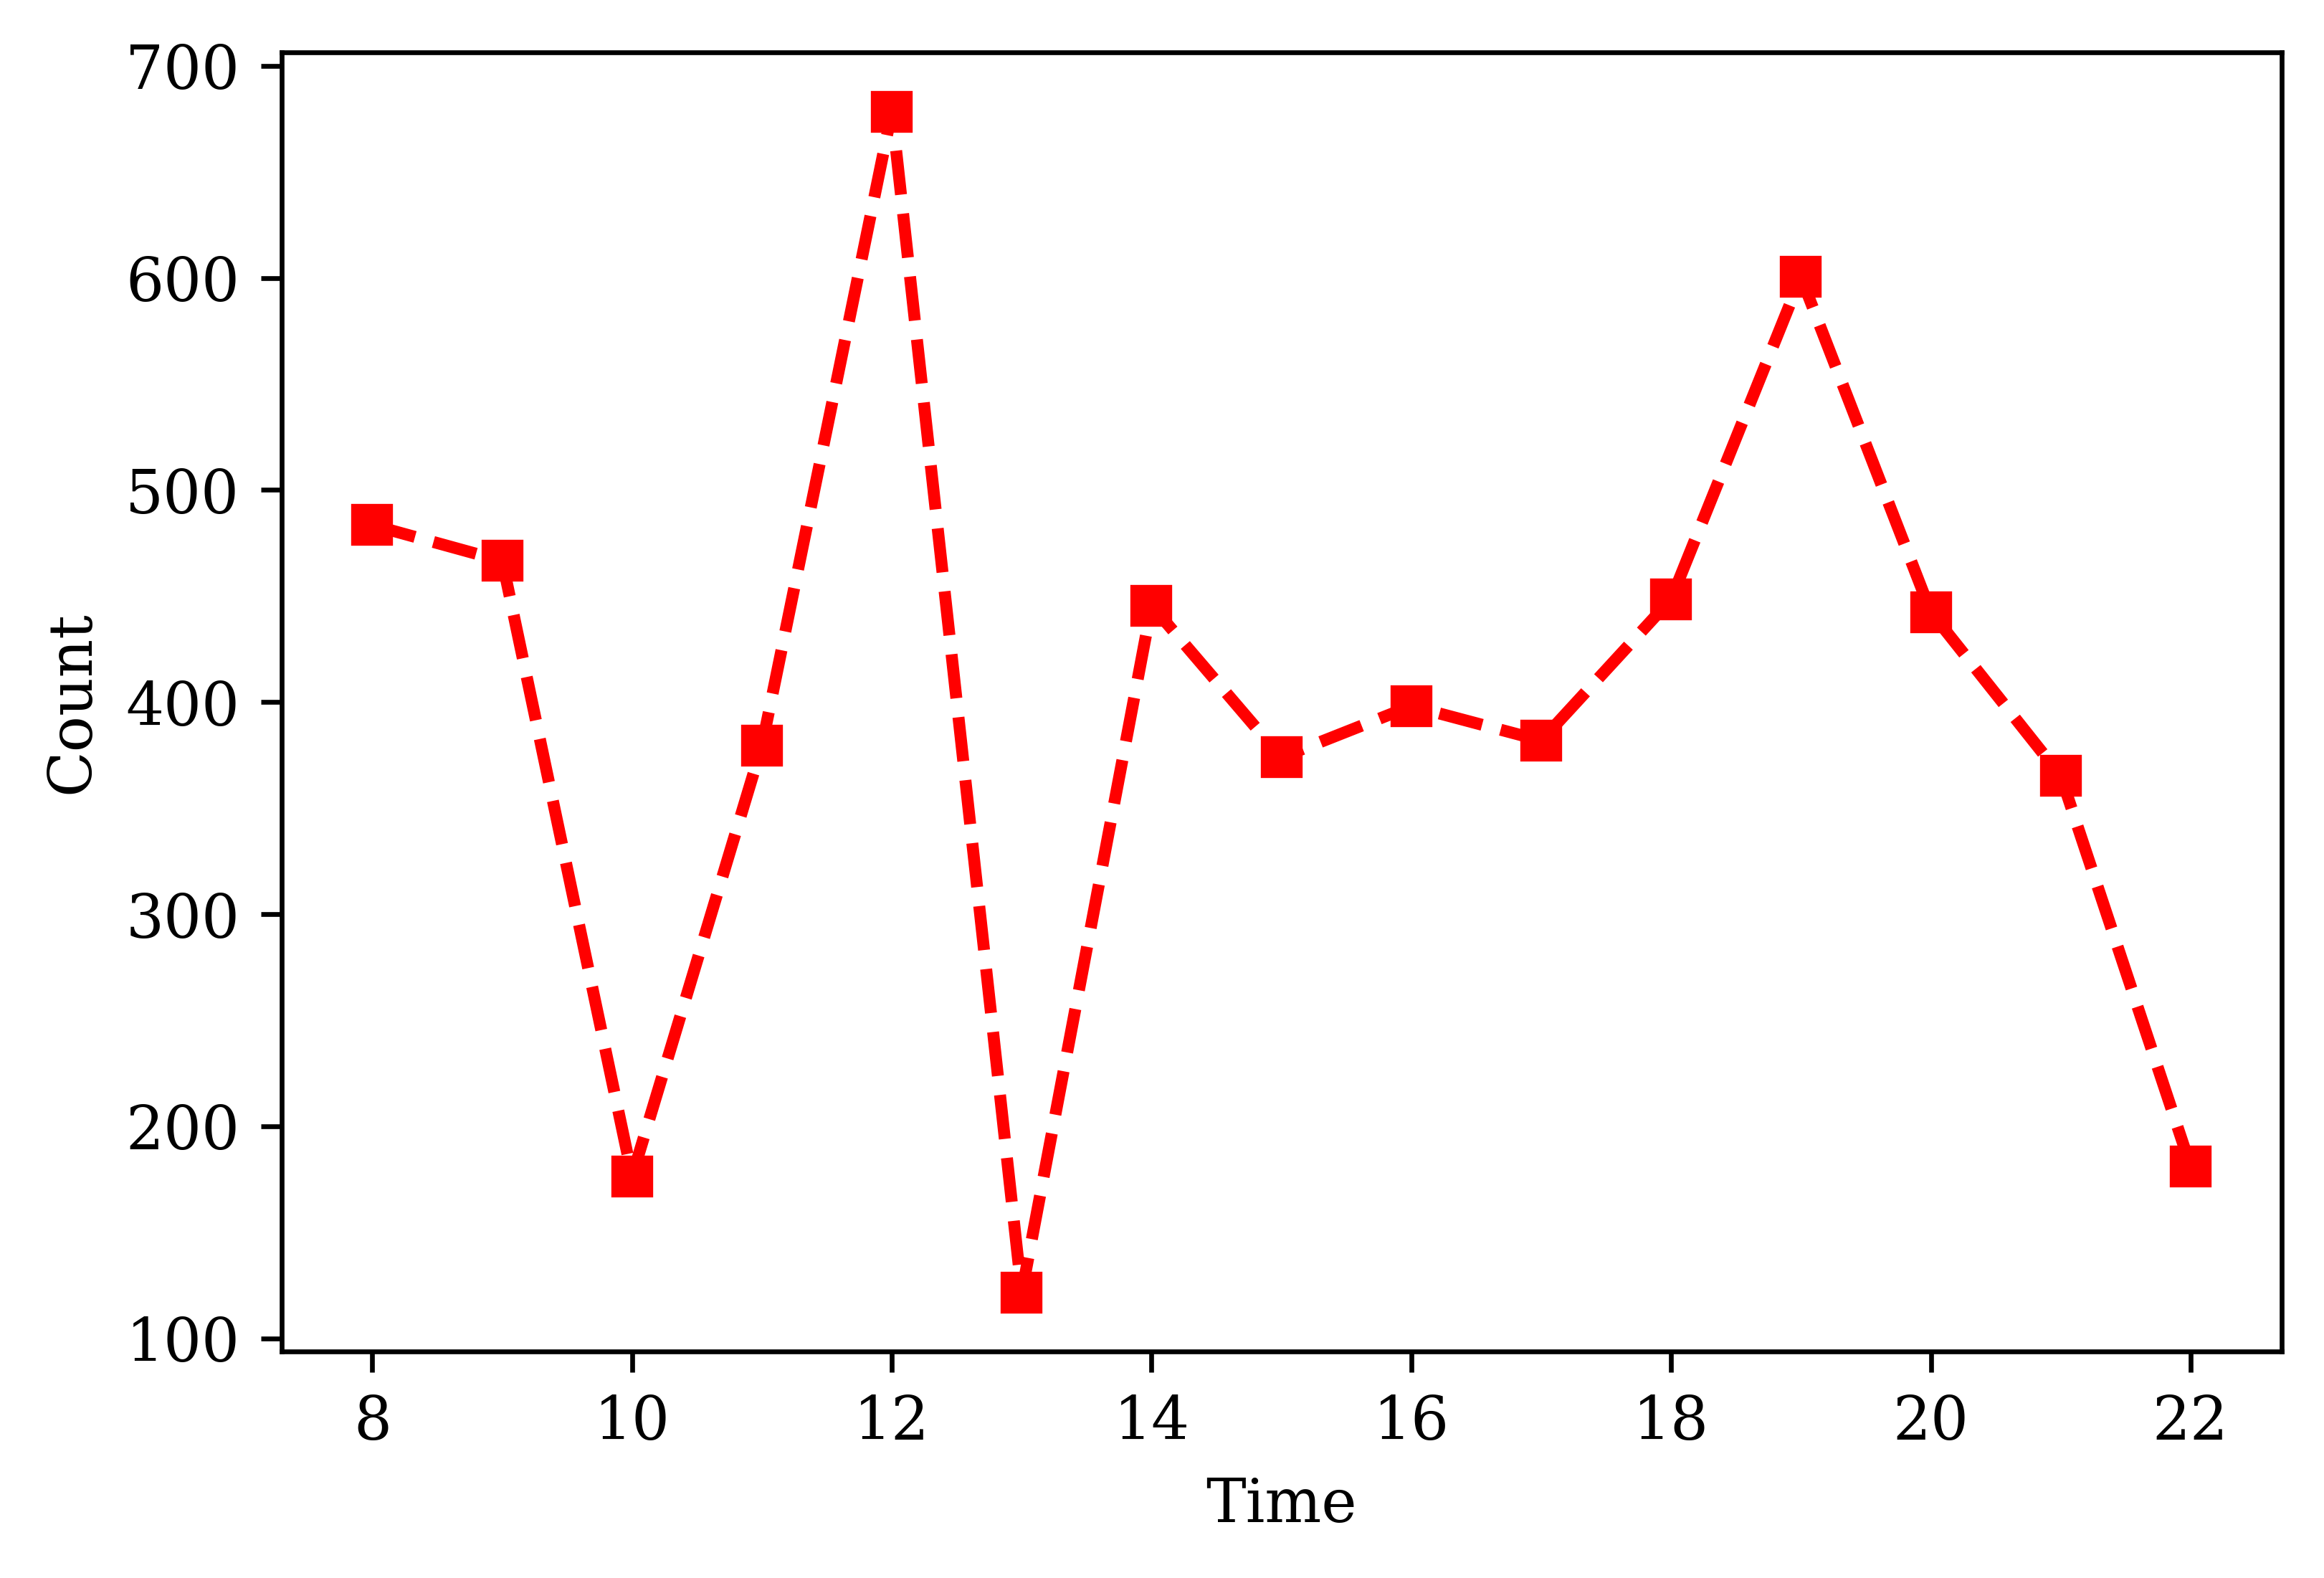

In [205]:
plt.rcParams['font.family'] = 'serif'
plt.figure(dpi=600)
plt.plot(range(8,23),list2,ls='--',lw=2,marker='s',c='r')
plt.xlabel('Time')
plt.ylabel('Count')
plt.savefig('每小时乘客数量的变化.jpg')

In [206]:
'''
A方案的净收益 = 载客的收益(185)-等待时花费的油费（1.5*X/60）*等待时间-正常行驶时的油费（6*8.39）*载客的时间(1.5)
B方案的净收益 = 节约时间的收益（出租车司机在市区每小时的平均收入50/h*预计等待时间）-正常时花费的油费*返回的时间（假设这个返回的时间与载客的时间是一致的）
A-B>0
#蓄车区的出租车的数量
        count=600
        #乘客的数量
        count_p=500
'''
#乘车区的可停放的出租车数量
stop_x=4
#乘车区完全刷新一次
stop_t=5
flag='A'
list_1=[]
list_2=[]
for count in range(0,1000):
    for count_p in range(0,1000):
        if count<count_p:
            profit_A=180-1.5*8.39*5*count/(4*60)
            profit_B=50*5*count/(4*60)
        else:
            t=count*5/(4*60)+0.5
            profit_A=180-1.5*8.39*t
            profit_B=50*t
        list_1.append(profit_A)
        list_2.append(profit_B)
        flag_1=flag
        if profit_A>profit_B:
            flag='A'
        else:
            flag='B'
        if(flag_1!=flag):
            print(count,' ',count_p,' ',flag)

115   0   B
115   116   A
116   0   B
116   117   A
117   0   B
117   118   A
118   0   B
118   119   A
119   0   B
119   120   A
120   0   B
120   121   A
121   0   B
121   122   A
122   0   B
122   123   A
123   0   B
123   124   A
124   0   B
124   125   A
125   0   B
125   126   A
126   0   B
126   127   A
127   0   B
127   128   A
128   0   B
128   129   A
129   0   B
129   130   A
130   0   B
130   131   A
131   0   B
131   132   A
132   0   B
132   133   A
133   0   B
133   134   A
134   0   B
134   135   A
135   0   B
135   136   A
136   0   B
136   137   A
137   0   B
137   138   A
138   0   B
138   139   A
139   0   B


In [213]:
'''
乘客数量<蓄车池出租车数量 115辆
乘客数量>蓄车池出租车数量 138辆

乘客数量<115人 出租车数量>115辆  B方案
乘客数量>115人 出租车数量<115辆  A方案

乘客数量<138人 出租车数量>138辆  B方案
乘客数量>138人 出租车数量<138辆  A方案
'''
def generation():
    T=1  #表示初始的时刻
    count_taxi=1
    count_p=1
    T_taxi=T+int(np.random.exponential(30))
    T_p=T+int(np.random.exponential(30))
    list_taxi=[]
    list_p=[]
    for T in range(8000):

        if(T>=T_taxi):
            #False 表示在蓄车池
            list_taxi.append({'T':T,'ID':count_taxi,'flag':False,'T_l':None,'wait-time':None})
            T_taxi=T+int(np.random.exponential(30))
            count_taxi+=1
        if(T>=T_p):
            #False 表示在排队
            list_p.append({'T':T,'ID':count_p,'flag':False,'T_l':None,'wait-time':None})
            T_p=T+int(np.random.exponential(30))
            count_p+=1
    return list_taxi,list_p

In [214]:
list_taxi,list_p=generation()
def find_taxi(list_taxi=list_taxi):
    ID=None
    #寻找taxi为false表示在蓄车池里的taxi count最小的
    for taxi in list_taxi:
        if taxi['flag']==False:
            ID=taxi['ID']
            break
    return ID
def find_p(list_p=list_p):
    ID=None
    #寻找taxi为false表示在蓄车池里的taxi count最小的
    for p in list_p:
        if p['flag']==False:
            ID=p['ID']
            break
    return ID
print(find_taxi(list_taxi),find_p(list_p))

1 1


In [215]:
def gen_com(N=5):
    list_taxi,list_p=generation()
    for T in range(7150):
        for i in range(1,N):
            if(T>list_taxi[find_taxi(list_taxi)-1]['T'] and T>list_p[find_p(list_p)-1]['T']):
                #生成随机上车时间，确定出租车驶离时间
                time_p=int(np.random.exponential(10))+1
                list_taxi[find_taxi(list_taxi)-1]['T_l']=T+time_p
                list_taxi[find_taxi(list_taxi)-1]['wait-time']=list_taxi[find_taxi(list_taxi)-1]['T_l']-list_taxi[find_taxi(list_taxi)-1]['T']
                list_taxi[find_taxi(list_taxi)-1]['flag']=True
                #update passenger
                list_p[find_p(list_p)-1]['T_l']=T+time_p
                list_p[find_p(list_p)-1]['wait-time']=list_p[find_p(list_p)-1]['T_l']-list_p[find_p(list_p)-1]['T']
                list_p[find_p(list_p)-1]['flag']=True

    wait_time=0
    count_taxi=0
    for taxi in list_taxi:
        if(taxi['flag']==True):
            # print(1)
            wait_time=wait_time+taxi['wait-time']
            count_taxi=count_taxi+1
    # print(count_taxi)
    wait_time2=0
    count_p=0
    for p in list_p:
        if(p['flag']==True):
            wait_time2=wait_time2+p['wait-time']
            count_p=count_p+1
    # print(wait_time)
    # print(count_p,count_taxi)
    return wait_time/count_taxi,wait_time2/count_p,list_taxi,list_p

def run(N_epoch=50,w1=0.4,w2=0.6):
    from tqdm import tqdm
    min=6000
    for N in range(2,10):
        t1=0
        t2=0
        for epoch in tqdm(range(N_epoch)):
            time_t,time_p,list_taxi,list_p=gen_com(N=N)
            t1=t1+time_t
            t2=t2+time_p
        t1=t1/N_epoch
        t2=t2/N_epoch
        print('N:',N,' Taxi time:',t1,'s Passenger time:',t2,'s')

        index=t1*w1+t2*w2
        if(index<min):
            min_N=N
            min=index
            min_taxi=list_taxi
            min_p=list_p
    return min_N,min_taxi,min_p
N,list_taxi,list_p=run()

100%|██████████| 50/50 [00:06<00:00,  7.79it/s]


N: 2  Taxi time: 193.13832896894957 s Passenger time: 155.53742327208732 s


100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


N: 3  Taxi time: 265.9301819506602 s Passenger time: 140.75045886914037 s


100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


N: 4  Taxi time: 193.86942847825833 s Passenger time: 162.41533510080546 s


100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


N: 5  Taxi time: 176.29409064845694 s Passenger time: 163.7287985519797 s


100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


N: 6  Taxi time: 177.2219942636638 s Passenger time: 165.82679742984394 s


100%|██████████| 50/50 [00:28<00:00,  1.77it/s]


N: 7  Taxi time: 229.61175197078734 s Passenger time: 149.11172502812585 s


100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


N: 8  Taxi time: 175.10149614701288 s Passenger time: 202.44017581336712 s


100%|██████████| 50/50 [00:29<00:00,  1.68it/s]

N: 9  Taxi time: 143.74632812820903 s Passenger time: 206.93031046911995 s


5


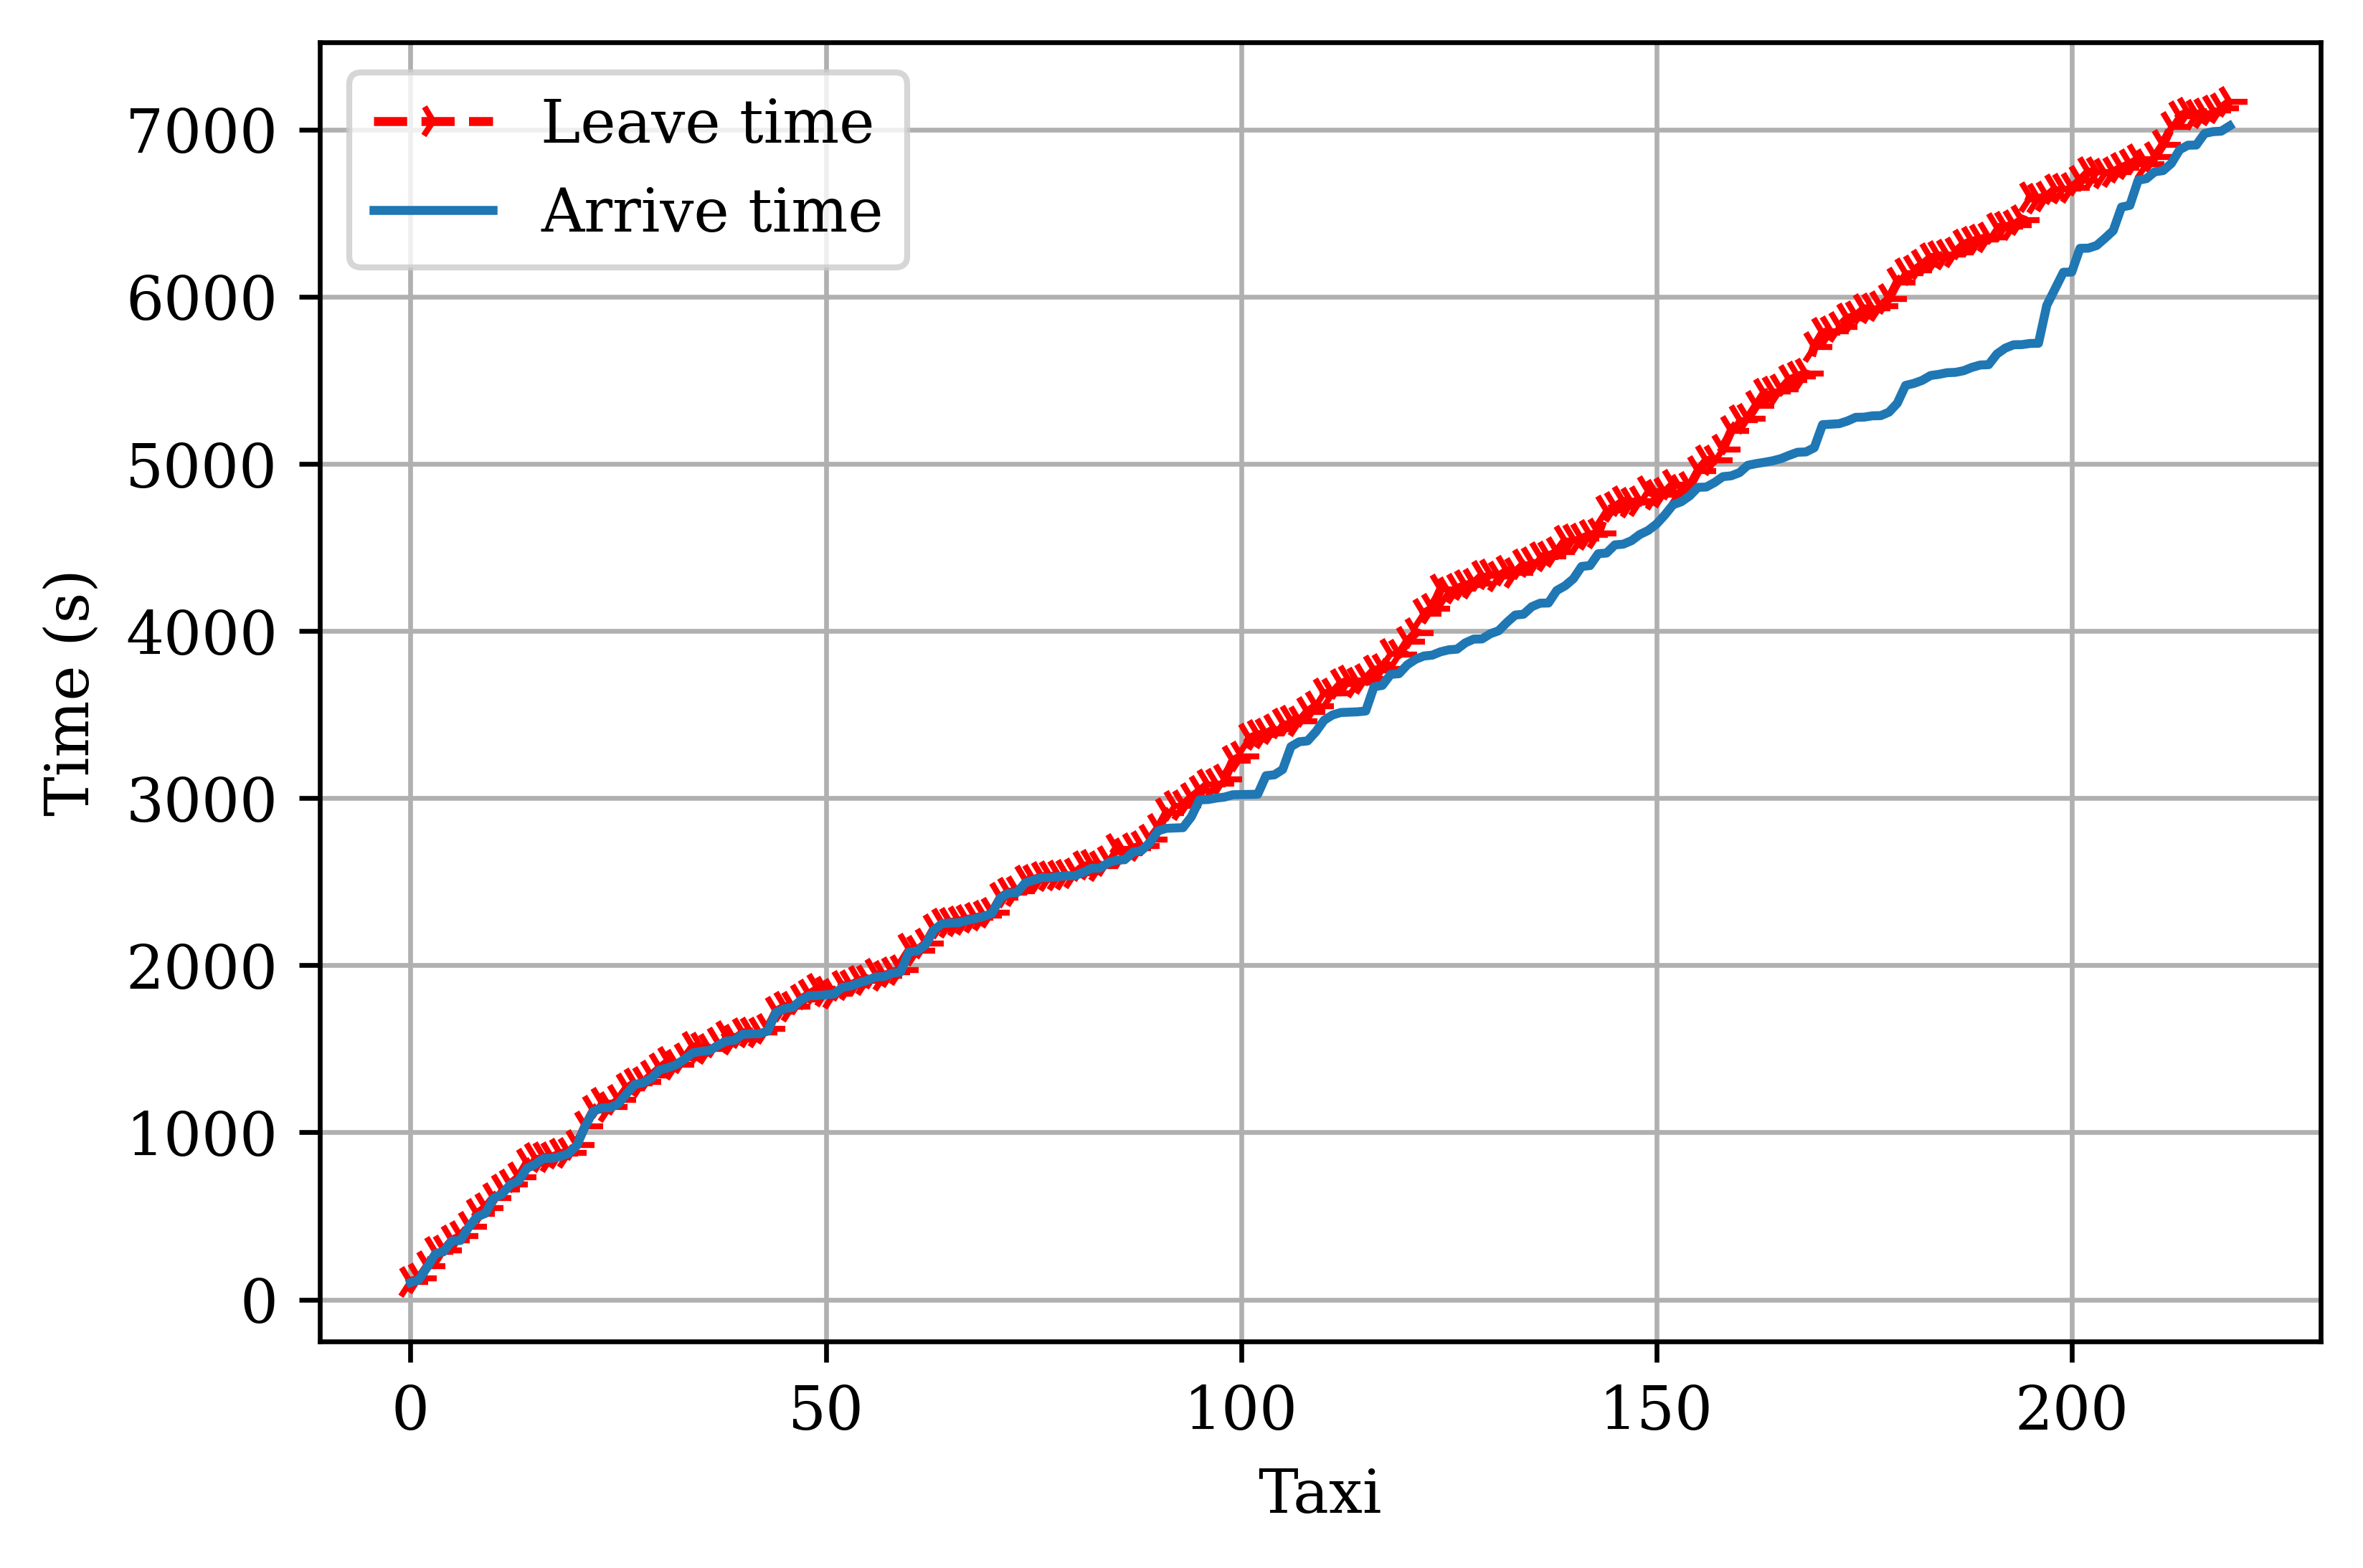

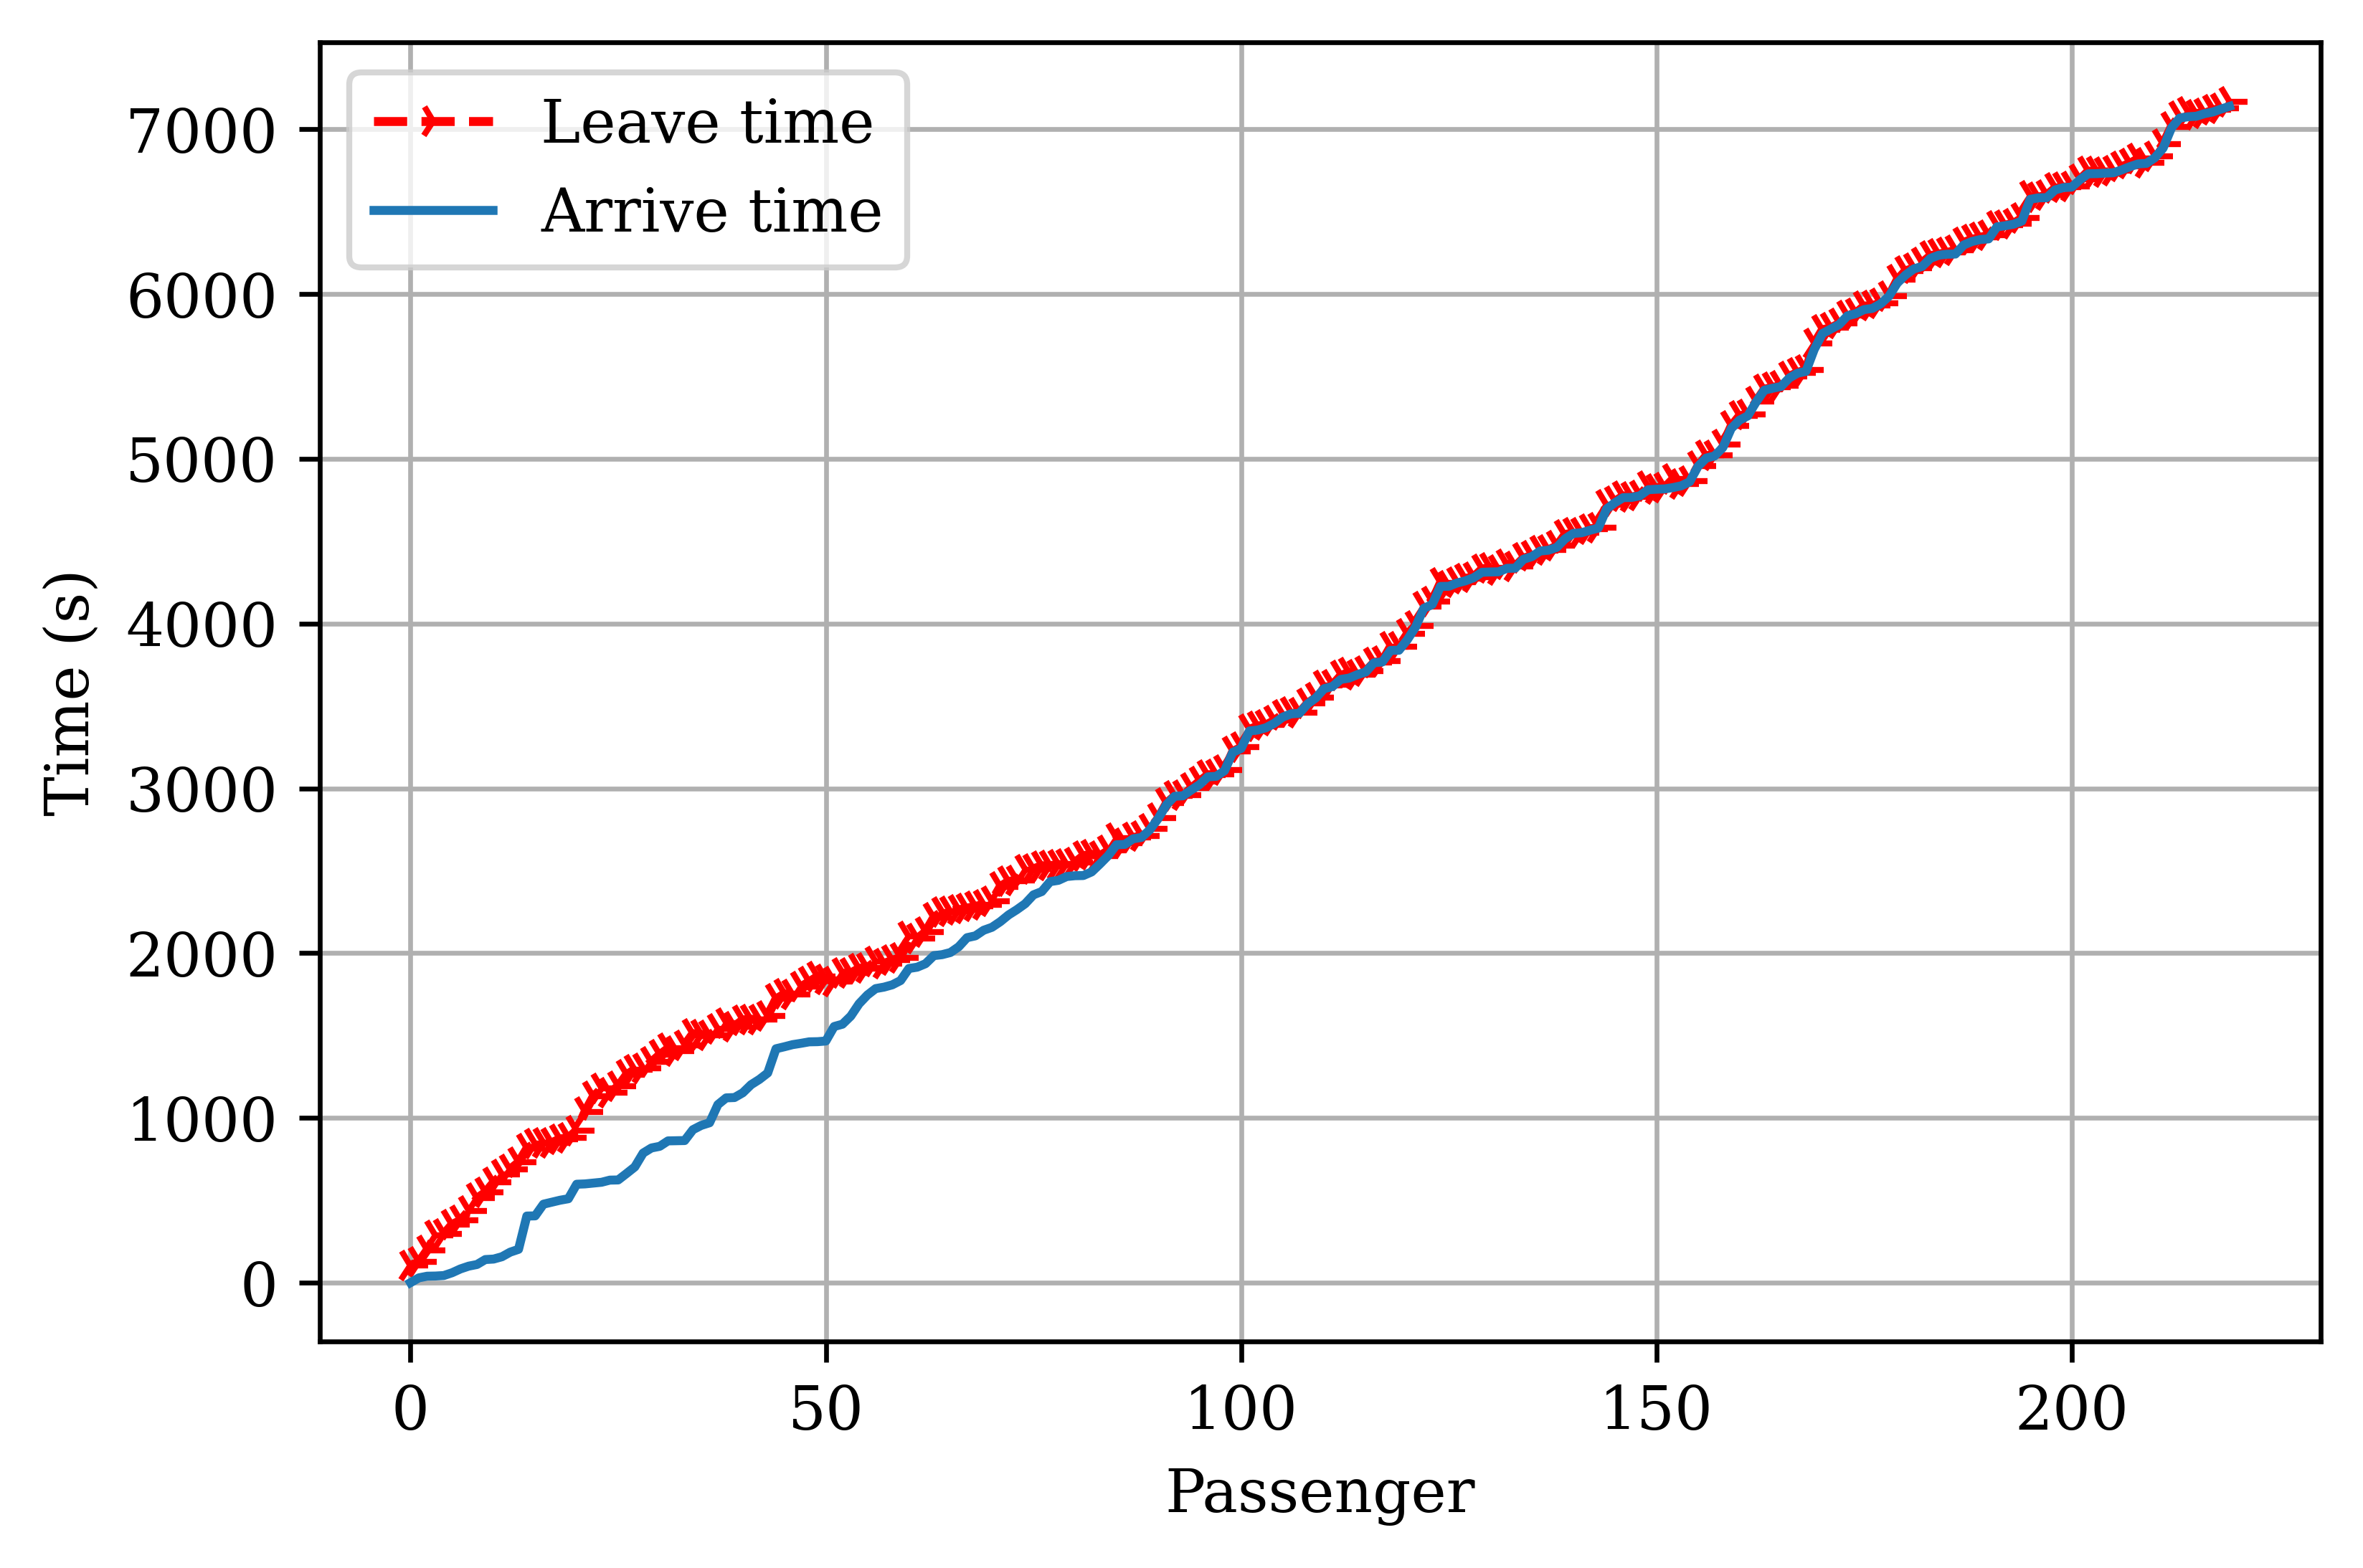

In [218]:
print(N)
def plot_figure(list_taxi,label):
    T_list=[]
    T_l_list=[]
    for taxi in list_taxi:
        if(taxi['flag']==True):
            T_list.append(taxi['T'])
            T_l_list.append(taxi['T_l'])
    plt.figure(dpi=600)

    plt.plot(range(len(T_l_list)),T_l_list,'r',marker='4',ls='--',label='Leave time')
    plt.plot(range(len(T_list)),T_list,label='Arrive time')
    plt.ylabel('Time (s)')
    plt.xlabel(label)
    plt.legend()
    plt.grid()
    plt.savefig(label+'.jpg')
plot_figure(list_taxi,'Taxi')
plot_figure(list_p,'Passenger')

  0%|          | 1/1000 [00:00<14:19,  1.16it/s]

135.8


  0%|          | 2/1000 [00:01<10:49,  1.54it/s]

112.43697478991596


  0%|          | 3/1000 [00:01<08:32,  1.95it/s]

87.85726872246697


  0%|          | 4/1000 [00:02<08:34,  1.93it/s]

76.5619771863118


  1%|          | 6/1000 [00:03<07:39,  2.16it/s]

67.5934693877551


  3%|▎         | 28/1000 [00:11<07:37,  2.13it/s]

65.8425


  3%|▎         | 32/1000 [00:13<06:23,  2.52it/s]

56.558196721311475


 13%|█▎        | 126/1000 [00:49<06:17,  2.32it/s]

54.69803921568628


 32%|███▏      | 323/1000 [02:05<03:55,  2.87it/s]

50.82753036437247


 42%|████▏     | 422/1000 [02:42<03:28,  2.78it/s]

50.14901960784314


100%|██████████| 1000/1000 [06:21<00:00,  2.62it/s]


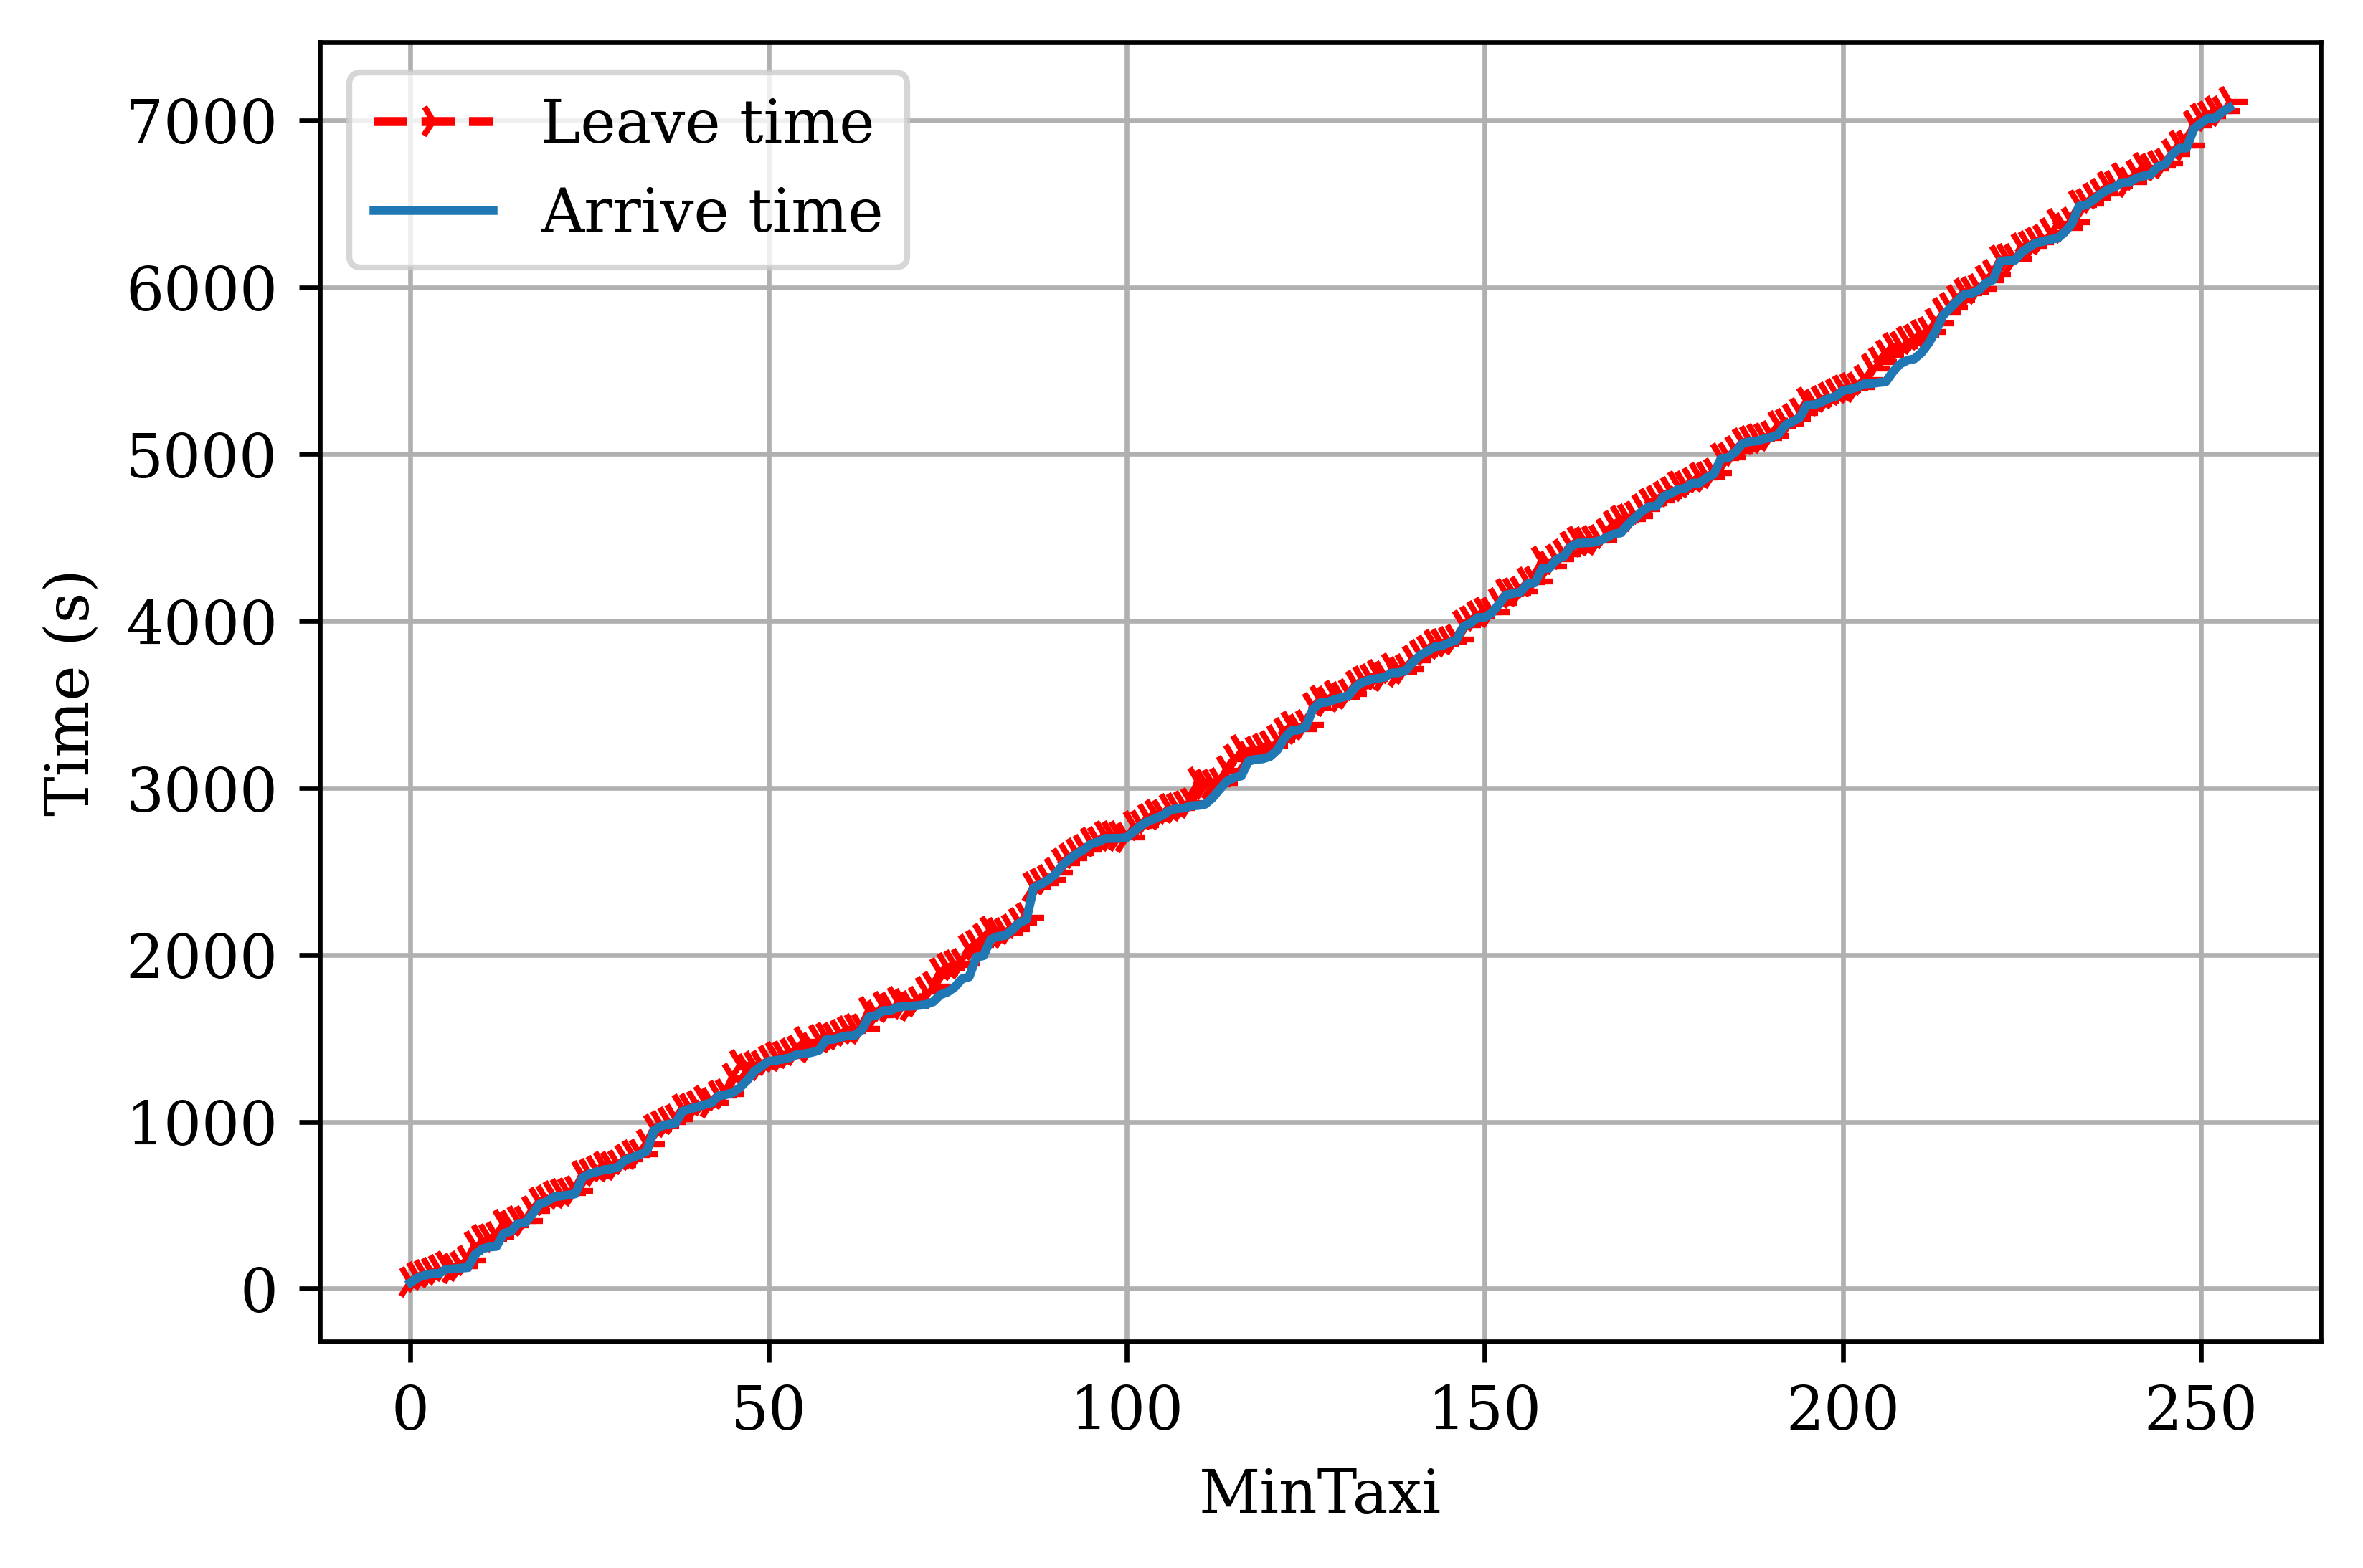

In [221]:
min=6000
from tqdm import tqdm
for epoch in tqdm(range(1000)):
    time_t,time_p,list_taxi,list_p=gen_com(N=N)
    index=time_t*0.4+time_p*0.6
    if(index<min):
        min_N=N
        min=index
        min_taxi=list_taxi
        min_p=list_p
        print(min)

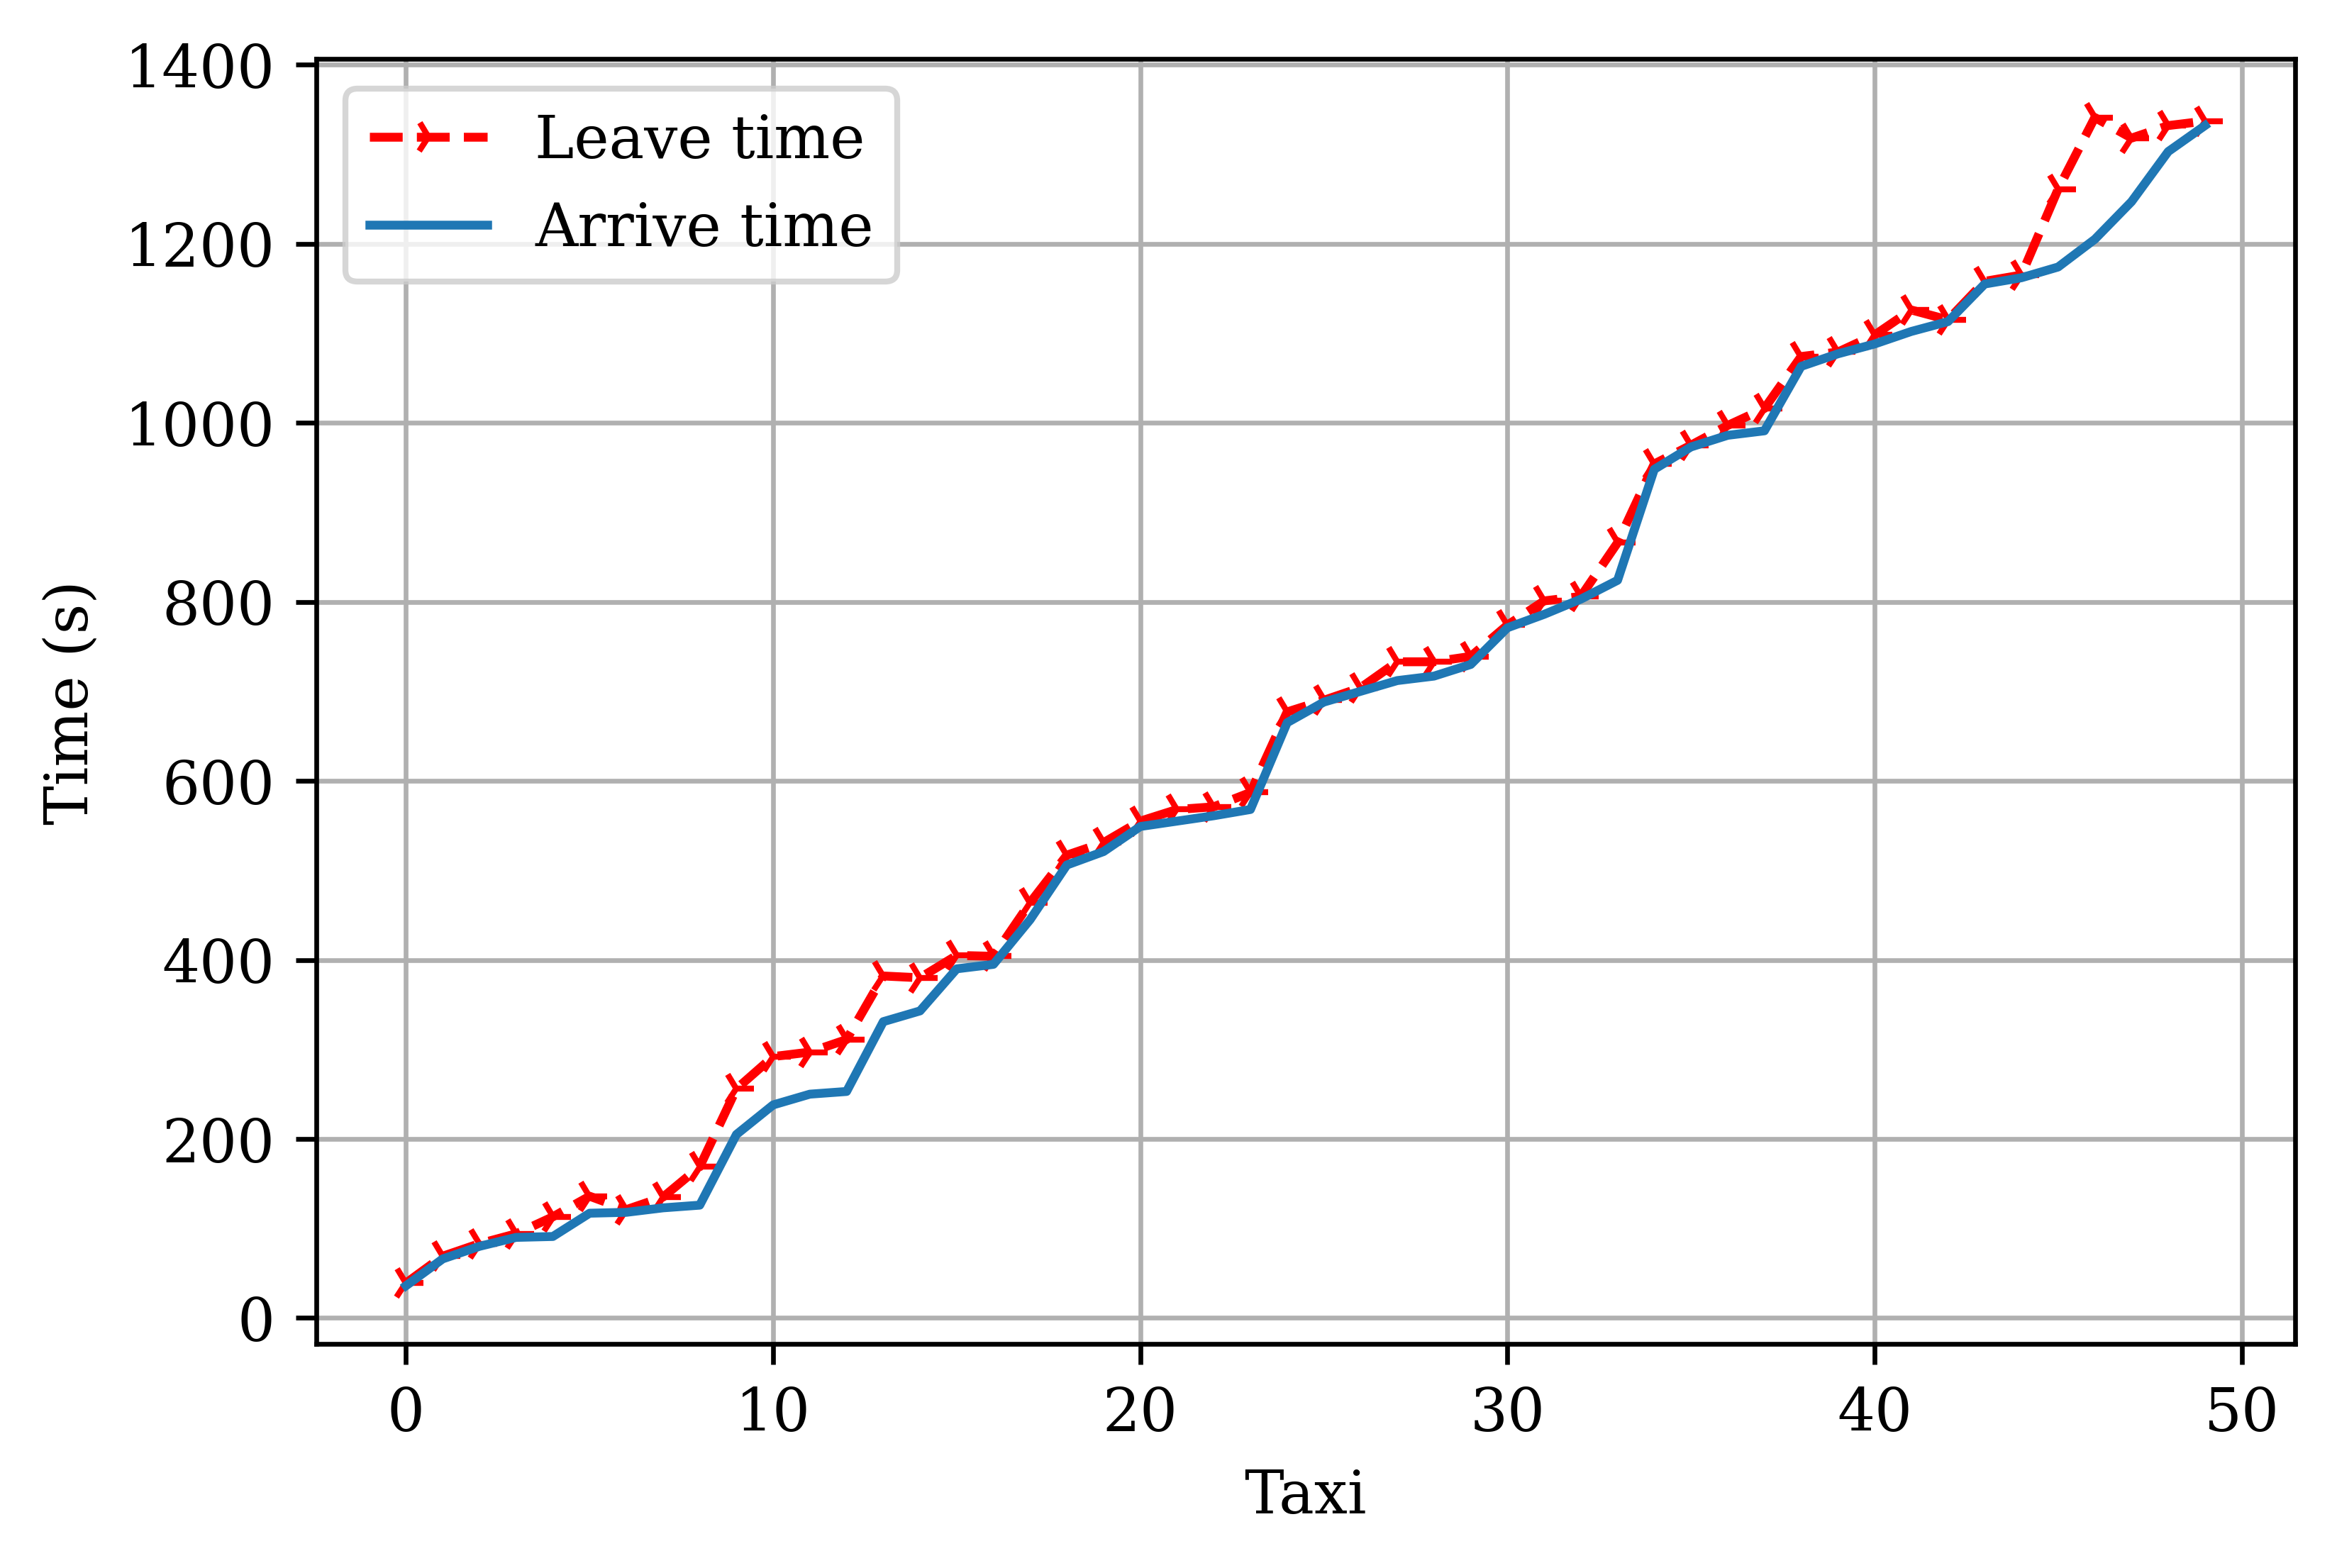

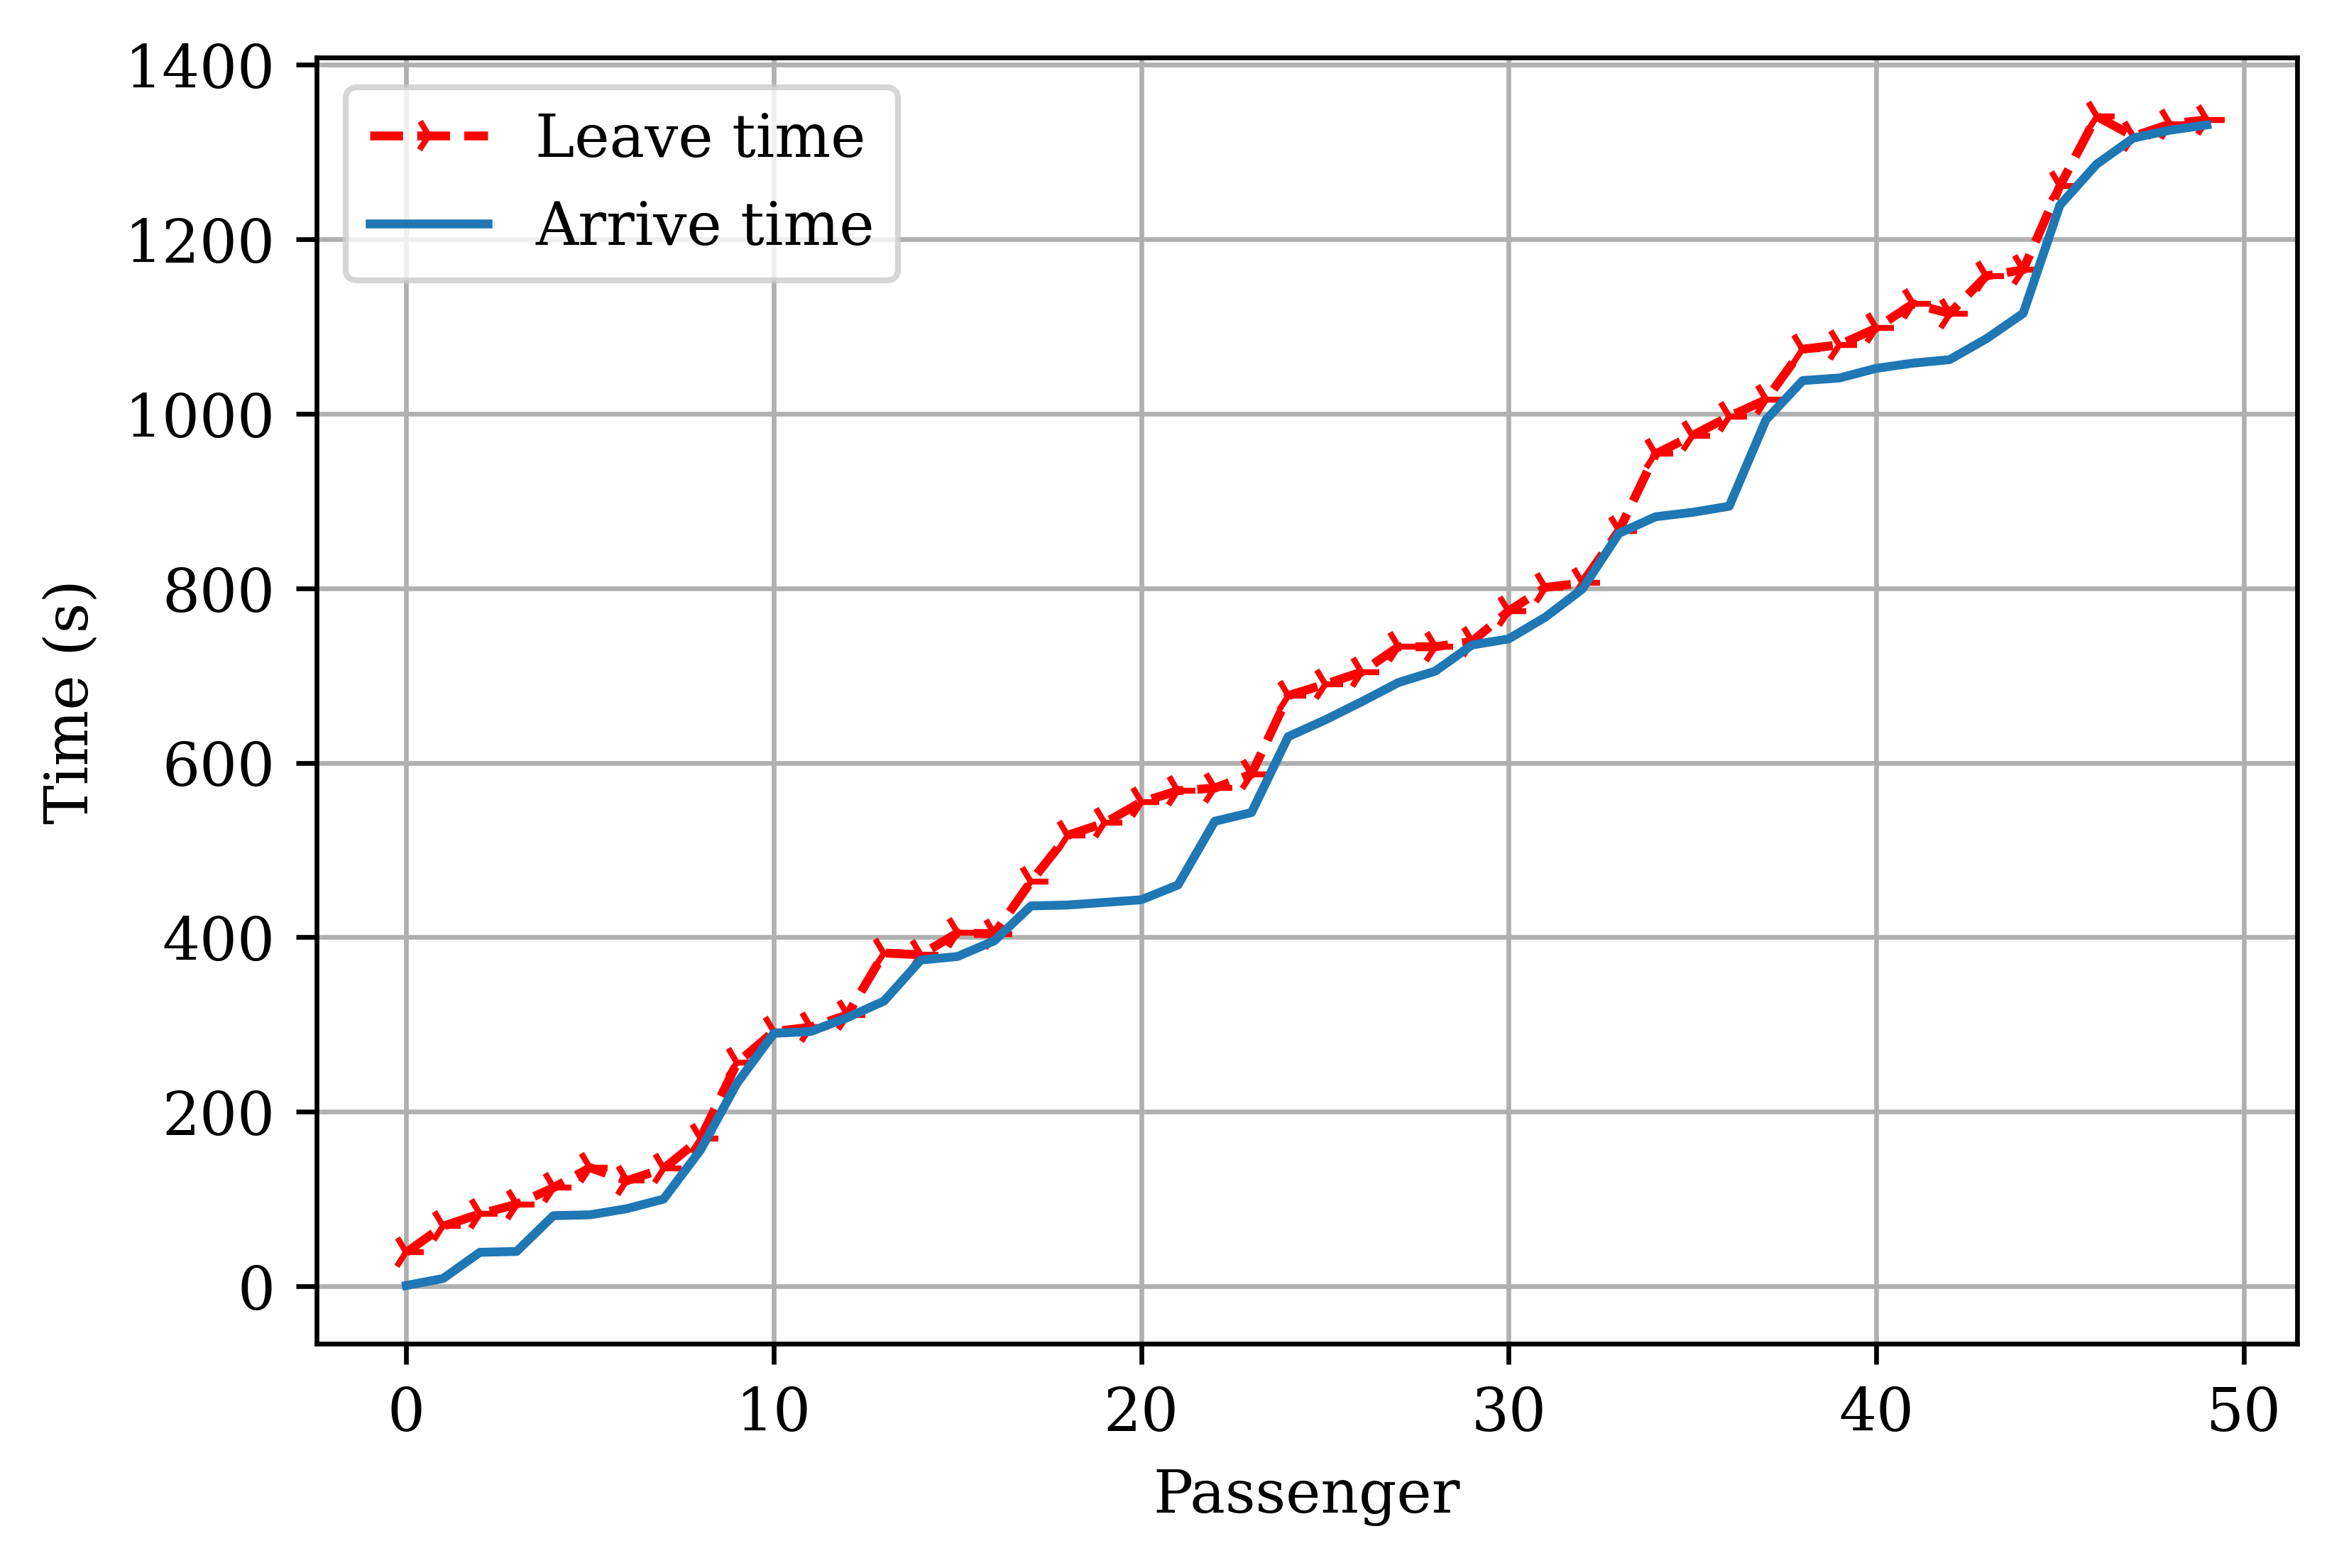

In [226]:
plot_figure(min_taxi[:50],'Taxi')
plot_figure(min_p[:50],'Passenger')